In [1]:
# %load deep_import.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


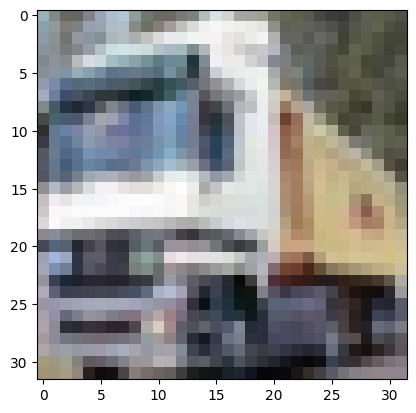

In [4]:
plt.imshow(x_train[1])
plt.show()

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train.shape

(50000, 10)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
modelpath = "./data/data/model/mnist_cifar10.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
early_stopping_callback =EarlyStopping(monitor='val_loss', patience=10)

In [11]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs= 500, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

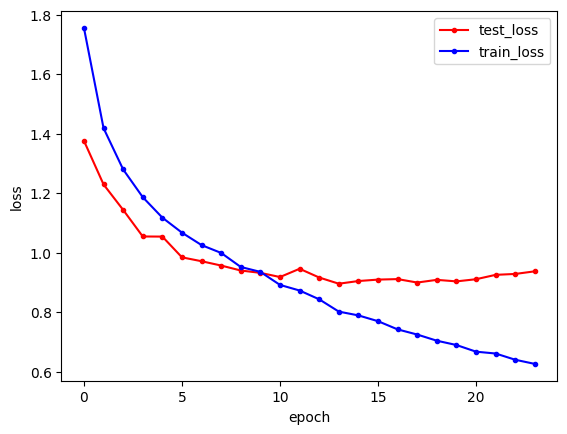

In [12]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
print("학습 정확도 : ", history.history['accuracy'][-1])
print("검증 정확도 : ", history.history['val_accuracy'][-1])
print("테스트 정확도 : ", model.evaluate(x_test, y_test)[1])

학습 정확도 :  0.7667999863624573
검증 정확도 :  0.697920024394989
313/313 [==============================] - 5s 17ms/step - loss: 0.9346 - accuracy: 0.6924
테스트 정확도 :  0.6923999786376953


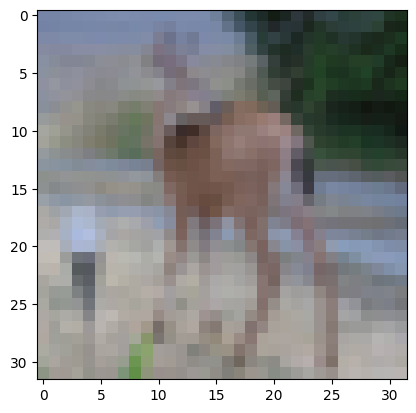

In [14]:
plt.imshow(x_test[100])
plt.show()

In [32]:
predict_class = model.predict(x_test[100].reshape(1,32,32,3))

1/1 [==============================] - 0s 23ms/step


In [29]:
predict_class.argmax()

4